# Morphological image operations

** Bird Counting **

I've used some simple morphological image operations from scipy.morphology module.

The goal was to count how many birds were in an image

Here are the steps taken :

1. Load the image as an ndimage matrix object
2. Filter all pixels for those with a color tone less than 100/255
3. Get a binary representation of the pixels that satisfy the condition in step 2
4. Apply some dilation and erosion in order to get rid of noise and isolate the birds
5. Count all contiguous areas

Original image:


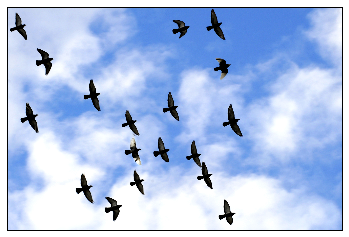

In [2]:
import scipy.ndimage
%matplotlib inline
import matplotlib.pyplot as plt
import numpy


def plotImage(image, cmap='gray'):
    birdsPlot = plt.imshow(image, cmap=cmap)
    birdsPlot.axes.get_xaxis().set_visible(False)
    birdsPlot.axes.get_yaxis().set_visible(False)
    plt.show()

birdsOriginal = scipy.ndimage.imread("images/birds.jpg")

print("Original image:")
plotImage(birdsOriginal)

Binary image:


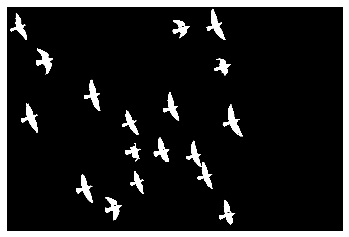

In [3]:
birdsColorMap = birdsOriginal < [100,100,100]

r,g,b = birdsColorMap.T

# Hack: Using the green channel, because in this particular image, when inverted, 
#       pixels with full green would mean it's a white pixel.

binaryBirds = g.T
print("Binary image:")
plotImage(binaryBirds)

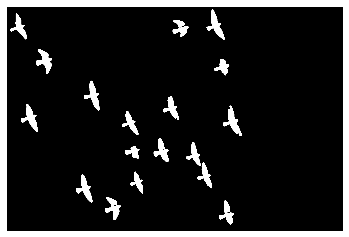

In [4]:
# I've chosen a disk-type structuring element so as to avoid birds' wings reaching out and touching others on dilation
struct = [[0, 0, 1, 1, 1, 0, 0],
          [0, 1, 1, 1, 1, 1, 0],
          [1, 1, 1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1, 1, 1],
          [0, 1, 1, 1, 1, 1, 0],
          [0, 0, 1, 1, 1, 0, 0]]


birdsImage = binaryBirds

# Two erosions and two dilations to get rid of noise, and isolate bird structures.
birdsImage = scipy.ndimage.binary_erosion(birdsImage, struct, iterations=2).astype(birdsImage.dtype)
birdsImage = scipy.ndimage.binary_dilation(birdsImage, struct, iterations=2).astype(birdsImage.dtype)

plotImage(birdsImage)

18 birds have been detected.


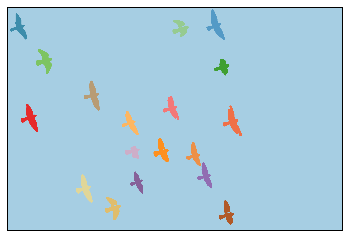

In [11]:
labeled_array, num_features = scipy.ndimage.label(birdsImage)

print("%d birds have been detected." % num_features)

# Plotting with a colorful color-map so as to demonstrate the contiguous areas detected
plotImage(labeled_array, 'Paired')